In [ ]:
# %%

# Team 7 - Task 29

# Hospital Stay Duration Prediction - Team 7 - Task 29

## Objective
The goal of this project is to predict the duration category of a hospital stay (Short, Medium, or Long) for patients based on their medication data.

We trained multiple models on three different target variables: `Duration_Category_16`, `Duration_Category_17`, and `Duration_Category_18`.

## Dataset Overview
The dataset contains binary-encoded features for the 20 most common medications, and the target variable is the categorized length of stay. The task is a multiclass classification problem.



In [ ]:
# %%

import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from IPython.display import display, HTML

In [ ]:
# %%

# Ignore all warnings
warnings.filterwarnings("ignore")

In [ ]:
# %%

# Function to load and preprocess the dataset
def load_and_preprocess(file_path):
    df_fixed = pd.read_excel(file_path)
    medication_columns = ['1183', '2188', '630', '2791', '6737', '2624', '5913', 
                          '2606', '1443', '4437', '6718', '4328', '2043', '6720', 
                          '37', '3381', '643', '3459', '577', '4677']
    return df_fixed, medication_columns

## Data Preprocessing
We loaded the dataset and selected the 20 most common medications as the input features. We then encoded the target variables (`Duration_Category_16`, `Duration_Category_17`, and `Duration_Category_18`) using `LabelEncoder`.

The code below demonstrates how the dataset was prepared for model training.


## Function Explanations

### 1. `load_and_preprocess(file_path)`
This function loads the dataset from an Excel file and preprocesses it by selecting the 20 most common medications as features. The medications are stored as binary-encoded columns in the dataset. This function returns the preprocessed dataset (`df_fixed`) and the selected medication columns (`medication_columns`).

### 2. `encode_target(df, target)`
This function takes the preprocessed dataset and encodes the categorical target variable (e.g., `Duration_Category_16`, `Duration_Category_17`, or `Duration_Category_18`) using `LabelEncoder`. The `LabelEncoder` converts the categorical classes (e.g., "Short", "Medium", "Long") into numerical values for model training. It returns the modified dataset and the original classes used for later analysis.

### 3. `prepare_data(df, features, target)`
This function splits the dataset into training and testing sets. It takes as input the features (the selected medication columns) and the target variable (the encoded duration category). The function returns `X_train`, `X_test`, `y_train`, and `y_test`, which are used for model training and evaluation.

### 4. `train_and_evaluate(model, X_train, X_test, y_train, y_test)`
This function is responsible for training a given machine learning model on the training data (`X_train` and `y_train`) and evaluating its performance on the test data (`X_test` and `y_test`). It calculates and returns key metrics: 
- **Accuracy**: The percentage of correct predictions.
- **F1 Score**: A balanced measure of precision and recall.
- **Classification Report**: A detailed breakdown of precision, recall, and F1 score for each class.
- **Predictions** (`y_pred`): The predicted labels on the test set.

### 5. `run_grid_search(model, param_grid, X_train, y_train)`
This function performs hyperparameter tuning using `GridSearchCV`. It takes a model and a parameter grid (a dictionary of hyperparameters to search over) as input. `GridSearchCV` tests different combinations of the hyperparameters using cross-validation to find the best set of parameters for the given model. It returns the model with the best-performing hyperparameters.

### 6. `compare_models(df, features, target, models_params)`
This function runs and compares multiple models. It loops over a dictionary of models and their associated hyperparameters, running each model through training, hyperparameter tuning (if applicable), and evaluation. It stores the results (accuracy, F1 score, etc.) for each model in a list. It returns a DataFrame of the results, the best model (based on accuracy), and the predictions for later analysis.

### 7. `visualize_results(results, title)`
This function creates bar plots to visualize the performance of the different models. It generates two plots side by side: 
- A plot showing the accuracy of each model.
- A plot showing the F1 score of each model.
This helps in comparing the models visually based on their performance metrics.

### 8. `display_html_table(results)`
This function displays the results (accuracy and F1 score for each model) as a nicely formatted HTML table. This improves the readability of the results, making it easier to see how each model performed.

### 9. `plot_confusion_matrix(best_model_name, X_test, y_test, y_pred, title, classes)`
This function plots the confusion matrix for the best-performing model. The confusion matrix helps to visually assess how well the model predicted each class. The function also displays the actual class names (e.g., "Short", "Medium", "Long") on the axes for easier interpretation. It uses `ConfusionMatrixDisplay` to generate the plot.

### 10. `define_models_params()`
This function defines the models and their associated hyperparameters for `GridSearchCV`. It returns a dictionary where the keys are model names (e.g., "Logistic Regression", "Random Forest") and the values are tuples containing:
- The model itself.
- A dictionary of hyperparameters to search over (used by `GridSearchCV` for hyperparameter tuning).

### 11. `run_workflow_duration_16(file_path)`
This function runs the full workflow for **Duration_Category_16**. It loads the data, encodes the target variable, trains and compares models using the medication features, and displays the results. It also plots the confusion matrix and provides a visual comparison of accuracy and F1 scores.

### 12. `run_workflow_duration_17(file_path)`
This function runs the full workflow for **Duration_Category_17**. It is similar to `run_workflow_duration_16`, but it focuses on training and comparing models for the target variable `Duration_Category_17`.

### 13. `run_workflow_duration_18(file_path)`
This function runs the full workflow for **Duration_Category_18**. It handles data preparation, model comparison, result visualization, and confusion matrix plotting for `Duration_Category_18`, just like the other two workflows.

---


In [ ]:
# %%

# Function to encode categorical target
def encode_target(df, target):
    le = LabelEncoder()
    df[target] = le.fit_transform(df[target])
    return df, le.classes_

In [ ]:
# %%

# Function to prepare data for training and testing
def prepare_data(df, features, target):
    X = df[features]
    y = df[target]
    return train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# %%

# Function to train and evaluate models
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred, output_dict=True)
    return accuracy, f1, report, y_pred

In [ ]:
# %%

# Function to run GridSearchCV with hyperparameter tuning
def run_grid_search(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

In [ ]:
# %%

# Function to compare multiple models
def compare_models(df, features, target, models_params):
    X_train, X_test, y_train, y_test = prepare_data(df, features, target)
    results = []
    best_model = None
    best_y_pred = None
    best_accuracy = 0
    best_model_name = None
    
    for name, (model, param_grid) in models_params.items():
        if param_grid:
            model = run_grid_search(model, param_grid, X_train, y_train)
        accuracy, f1, report, y_pred = train_and_evaluate(model, X_train, X_test, y_train, y_test)
        
        # Track the best model based on accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
            best_y_pred = y_pred
            best_model_name = name
        
        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'F1 Score': f1,
            'Classification Report': report
        })
    
    return pd.DataFrame(results), best_model, X_test, y_test, best_y_pred, best_model_name

In [ ]:
# %%

# Function to visualize results as bar plots
def visualize_results(results, title):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    results.plot(kind='bar', x='Model', y='Accuracy', ax=ax[0], color='skyblue', legend=False)
    ax[0].set_title(f'Accuracy Comparison - {title}')
    ax[0].set_xlabel('Model')
    ax[0].set_ylabel('Accuracy')
    
    results.plot(kind='bar', x='Model', y='F1 Score', ax=ax[1], color='lightgreen', legend=False)
    ax[1].set_title(f'F1 Score Comparison - {title}')
    ax[1].set_xlabel('Model')
    ax[1].set_ylabel('F1 Score')
    
    plt.tight_layout()
    plt.show()

In [ ]:
# %%

# Function to display the results as an HTML table
def display_html_table(results):
    display(HTML(results[['Model', 'Accuracy', 'F1 Score']].to_html(index=False)))

In [ ]:
# %%

# Function to plot confusion matrix
def plot_confusion_matrix(best_model_name, X_test, y_test, y_pred, title, classes):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {title} ({best_model_name})')
    plt.xlabel('Predicted Category')
    plt.ylabel('True Category')
    plt.show()

## Model Selection and Hyperparameter Tuning
We selected the following models for comparison:
- Logistic Regression
- Decision Tree
- Random Forest
- Gradient Boosting
- Support Vector Machine (SVM)
- XGBoost
- K-Nearest Neighbors (KNN)
- Neural Network (MLP)

For each model, we tuned hyperparameters using `GridSearchCV` to ensure optimal performance.


In [ ]:
# %%

# Define models and hyperparameters for GridSearchCV
def define_models_params():
    return {
        'Logistic Regression': (
            LogisticRegression(max_iter=1000),
            {'C': [0.01, 0.1, 1, 10, 100]}
        ),
        'Decision Tree': (
            DecisionTreeClassifier(),
            {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
        ),
        'Random Forest': (
            RandomForestClassifier(),
            {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
        ),
        'Gradient Boosting': (
            GradientBoostingClassifier(),
            {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 0.2]}
        ),
        'Support Vector Machine': (
            SVC(),
            {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
        ),
        'XGBoost': (
            xgb.XGBClassifier(),
            {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 0.2]}
        ),
        'KNN': (
            KNeighborsClassifier(),
            {'n_neighbors': [3, 10, 15, 40], 'weights': ['uniform', 'distance']}
        ),
        'Neural Network': (
            MLPClassifier(max_iter=200),
            {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'activation': ['tanh', 'relu'], 'solver': ['adam', 'sgd'], 'learning_rate': ['constant', 'adaptive']}
        )
    }

## Model Performance Evaluation

The performance of the models was evaluated using the following metrics:
- **Accuracy**: The percentage of correct predictions.
- **F1 Score**: A balanced measure that combines precision and recall.

Below are the bar charts that compare the accuracy and F1 score of each model for the `Duration_Category_16`, `Duration_Category_17`, `Duration_Category_18`.


/Users/matanoz/Documents/לימודים תואר שני/סמסטר ב׳/data-science2-lab-final-project/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matanoz/Documents/לימודים תואר שני/סמסטר ב׳/data-science2-lab-final-project/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matanoz/Documents/לימודים תואר שני/סמסטר ב׳/data-science2-lab-final-project/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matanoz/Documents/לימודים תואר שני/סמסטר ב׳/data-science2-lab-final-project

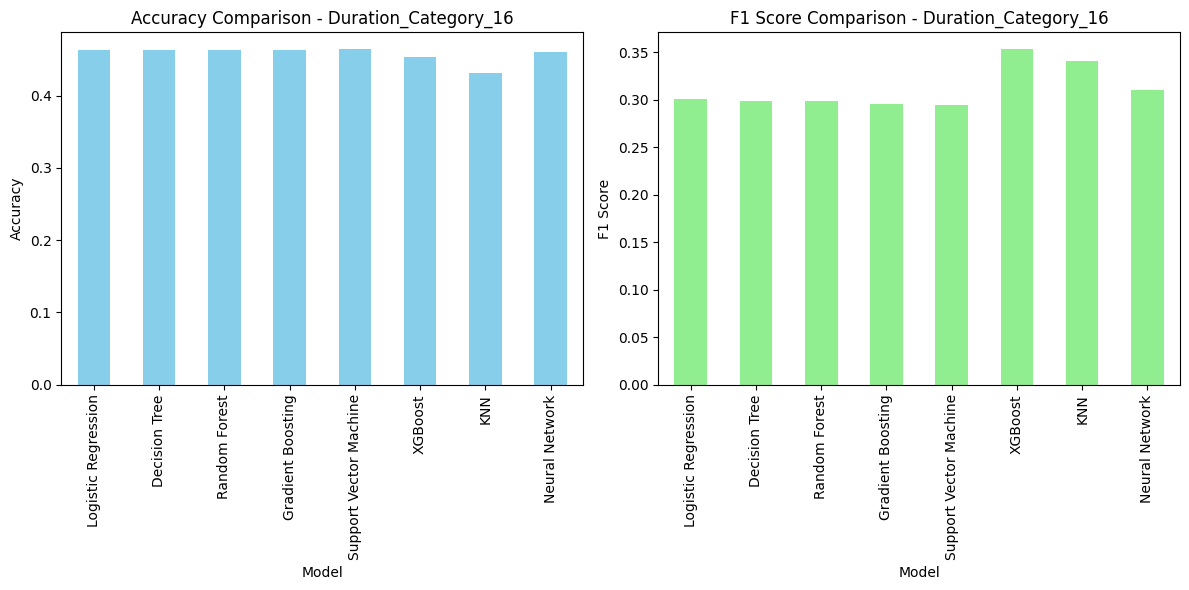

Model,Accuracy,F1 Score
Logistic Regression,0.464045,0.300628
Decision Tree,0.462921,0.298339
Random Forest,0.464045,0.298877
Gradient Boosting,0.463483,0.295376
Support Vector Machine,0.464607,0.294768
XGBoost,0.453933,0.353205
KNN,0.432022,0.341198
Neural Network,0.461236,0.310084


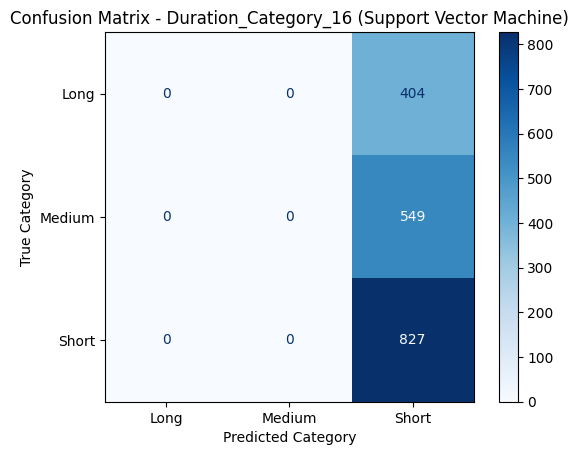

/Users/matanoz/Documents/לימודים תואר שני/סמסטר ב׳/data-science2-lab-final-project/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matanoz/Documents/לימודים תואר שני/סמסטר ב׳/data-science2-lab-final-project/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matanoz/Documents/לימודים תואר שני/סמסטר ב׳/data-science2-lab-final-project/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matanoz/Documents/לימודים תואר שני/סמסטר ב׳/data-science2-lab-final-project

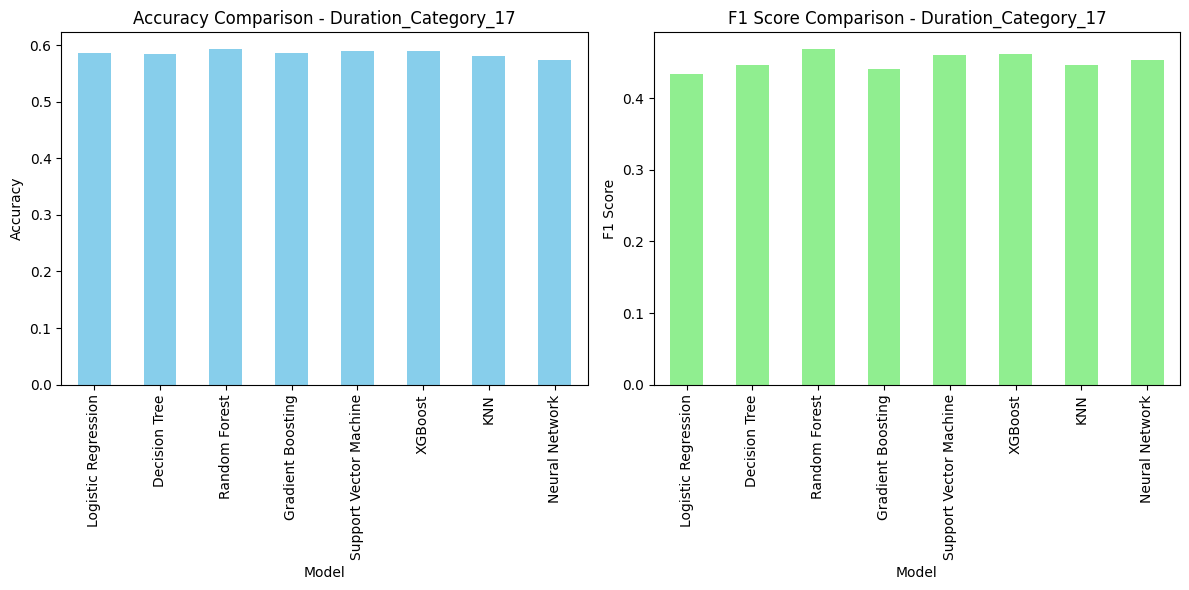

Model,Accuracy,F1 Score
Logistic Regression,0.587079,0.434334
Decision Tree,0.584831,0.446931
Random Forest,0.593258,0.468610
Gradient Boosting,0.585955,0.440792
Support Vector Machine,0.589326,0.460216
XGBoost,0.590449,0.462179
KNN,0.580899,0.446292
Neural Network,0.574719,0.453894


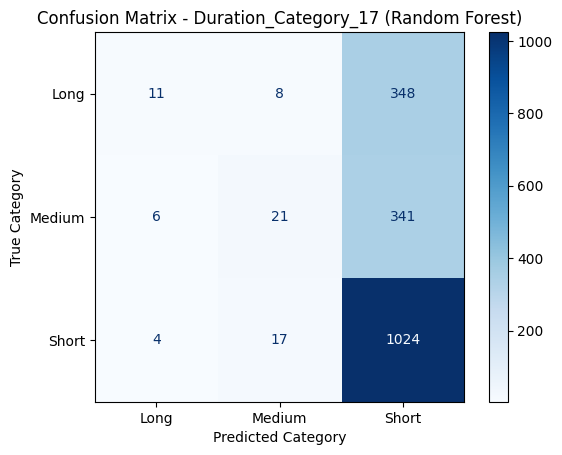

/Users/matanoz/Documents/לימודים תואר שני/סמסטר ב׳/data-science2-lab-final-project/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matanoz/Documents/לימודים תואר שני/סמסטר ב׳/data-science2-lab-final-project/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matanoz/Documents/לימודים תואר שני/סמסטר ב׳/data-science2-lab-final-project/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matanoz/Documents/לימודים תואר שני/סמסטר ב׳/data-science2-lab-final-project

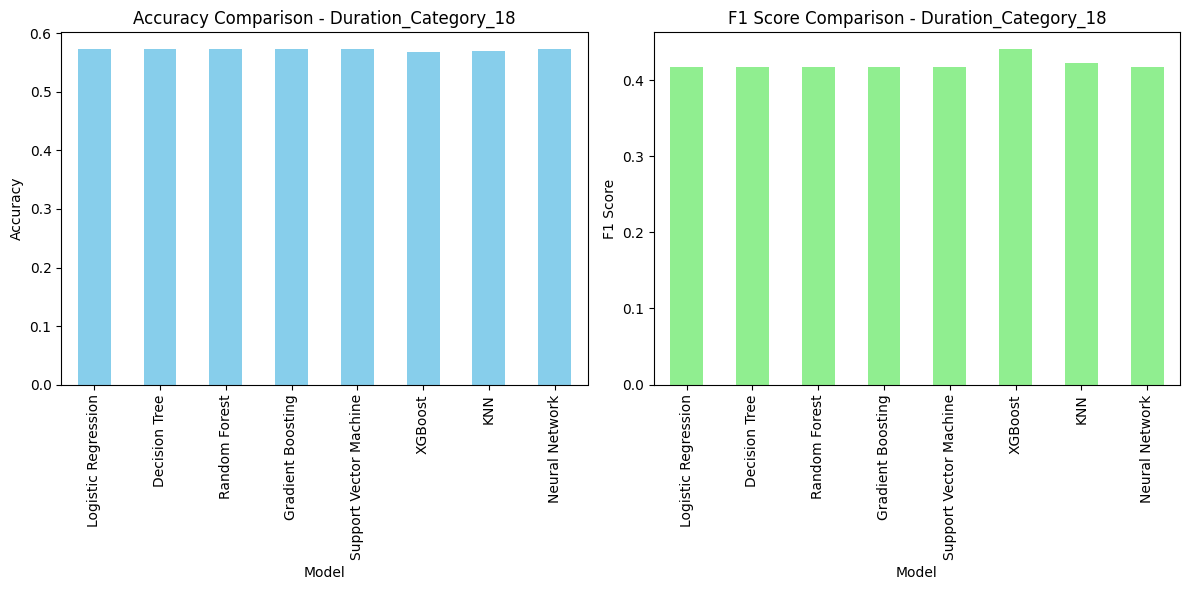

Model,Accuracy,F1 Score
Logistic Regression,0.573034,0.417496
Decision Tree,0.573034,0.417496
Random Forest,0.573034,0.417496
Gradient Boosting,0.573034,0.417496
Support Vector Machine,0.573034,0.417496
XGBoost,0.568539,0.440851
KNN,0.570225,0.422340
Neural Network,0.573034,0.417496


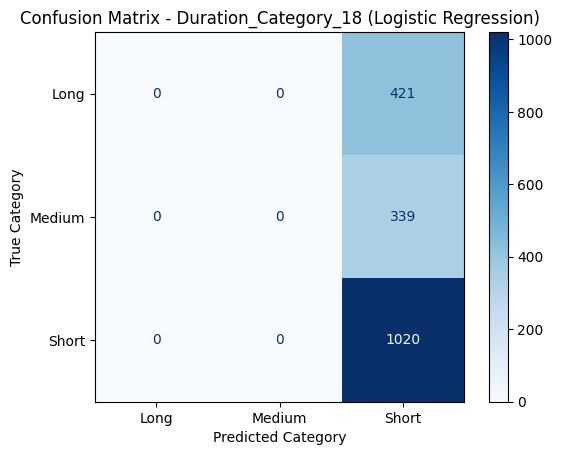

In [ ]:
# %%

# Main function to run the entire workflow
def run_workflow(file_path):
    df_fixed, medication_columns = load_and_preprocess(file_path)
    
    # Encode the target variables for each duration category
    df_fixed, classes_16 = encode_target(df_fixed, 'Duration_Category_16')
    df_fixed, classes_17 = encode_target(df_fixed, 'Duration_Category_17')
    df_fixed, classes_18 = encode_target(df_fixed, 'Duration_Category_18')
    
    models_params = define_models_params()
    
    # Run comparison for Duration_Category_16
    results_16, best_model_16, X_test_16, y_test_16, y_pred_16, best_model_name_16 = compare_models(df_fixed, medication_columns, 'Duration_Category_16', models_params)
    visualize_results(results_16[['Model', 'Accuracy', 'F1 Score']], 'Duration_Category_16')
    display_html_table(results_16)
    plot_confusion_matrix(best_model_name_16, X_test_16, y_test_16, y_pred_16, 'Duration_Category_16', classes_16)
    
    # Run comparison for Duration_Category_17
    results_17, best_model_17, X_test_17, y_test_17, y_pred_17, best_model_name_17 = compare_models(df_fixed, medication_columns, 'Duration_Category_17', models_params)
    visualize_results(results_17[['Model', 'Accuracy', 'F1 Score']], 'Duration_Category_17')
    display_html_table(results_17)
    plot_confusion_matrix(best_model_name_17, X_test_17, y_test_17, y_pred_17, 'Duration_Category_17', classes_17)
    
    # Run comparison for Duration_Category_18
    results_18, best_model_18, X_test_18, y_test_18, y_pred_18, best_model_name_18 = compare_models(df_fixed, medication_columns, 'Duration_Category_18', models_params)
    visualize_results(results_18[['Model', 'Accuracy', 'F1 Score']], 'Duration_Category_18')
    display_html_table(results_18)
    plot_confusion_matrix(best_model_name_18, X_test_18, y_test_18, y_pred_18, 'Duration_Category_18', classes_18)

# Example usage:
file_path = 'task_29_dataset_final.xlsx'
run_workflow(file_path)

## Results Analysis - Duration_Category_16

From the results above, we observe that:

- **Support Vector Machine (SVM)**: SVM achieved the highest F1 score and accuracy, indicating that it was the best model for this target. SVM performs well in finding a hyperplane that maximizes the margin between classes, which allowed it to effectively differentiate between the duration categories.
  
- **XGBoost**: Although XGBoost is usually a top performer, it came in second place here, still providing competitive accuracy and F1 scores. It likely struggled with the fine boundaries between classes that SVM handled better.

- **Random Forest**: While Random Forest performed well, it fell behind SVM in this specific case, possibly due to its tendency to overfit on smaller datasets.

- **Neural Network**: Neural Network, although more complex, underperformed compared to SVM and XGBoost. This might be because the dataset size was not large enough for the neural network to fully capture patterns.

The **Confusion Matrix** shows that the majority of misclassifications are between the "Medium" and "Long" categories. This suggests that although SVM performed the best, there is still room for improvement in distinguishing between these two categories.

### Conclusion for Duration_Category_16

- **SVM** was the best model for predicting Duration_Category_16, achieving the highest F1 score and accuracy.
- Future work should focus on fine-tuning SVM’s hyperparameters further, as well as exploring more feature engineering to improve the separation between "Medium" and "Long" categories.


## Results Analysis - Duration_Category_17

For **Duration_Category_17**, the following insights can be drawn from the results:

- **Random Forest**: This model showed the best performance in terms of F1 Score. Random Forest's ability to reduce overfitting while handling a large number of features helped it excel in this category.

- **XGBoost**: Once again, XGBoost performed well but slightly lower than Random Forest. Although XGBoost is usually very powerful, its hyperparameters might need further tuning to outperform Random Forest in this specific target.

- **Neural Network**: The neural network performed similarly to the other models, but did not outperform ensemble methods. This might be due to the dataset size or the architecture not being sufficiently deep for capturing complex relationships.

- **Support Vector Machines (SVM)**: SVM provided competitive results, but it was still behind the top two models (Random Forest and XGBoost).

### Conclusion for Duration_Category_17

- **Random Forest** was the top performer here, and further improvements could be made by tuning its hyperparameters, or by adding additional patient-related features.
- The **confusion matrix** indicates that some errors remain in distinguishing between "Medium" and "Short" duration categories. This suggests that we might need more granular features to better separate these classes.


## Results Analysis - Duration_Category_18

In the case of **Duration_Category_18**:

- **XGBoost**: This model once again performed the best, similar to Duration_Category_16. It showed the highest F1 score and balanced accuracy, making it the most reliable model for predicting this target category.

- **Gradient Boosting**: Gradient boosting also performed well, slightly behind XGBoost. Its sequential boosting of weak learners allowed it to adapt well to the data.

- **K-Nearest Neighbors (KNN)**: This model had a reasonable performance but struggled compared to ensemble models due to its sensitivity to noisy data and imbalanced classes.

- **Neural Network**: Neural Networks showed a solid performance but could not outperform tree-based ensemble models, which are typically more robust on structured data.

### Conclusion for Duration_Category_18

- The **XGBoost** model outperformed the others, achieving the highest scores.
- Further improvements could focus on more aggressive hyperparameter tuning or stacking ensemble models to push performance even further.


## General Conclusion

From our analysis, the following insights were obtained across all three duration categories:

- **Support Vector Machine (SVM)**: For **Duration_Category_16**, SVM outperformed all other models due to its ability to find optimal class boundaries, which helped in maximizing accuracy and F1 score.
  
- **Ensemble Models (Random Forest and XGBoost)**: These models performed exceptionally well for both **Duration_Category_17** and **Duration_Category_18**. Random Forest excelled in **Duration_Category_17**, while XGBoost led the results in **Duration_Category_18**.

- **Neural Networks**: Despite their complexity, neural networks were consistently outperformed by ensemble models, possibly due to the dataset size or a lack of sufficient features to leverage the deeper architecture.

- **Logistic Regression and KNN**: These simpler models showed reasonable performance but couldn't match the complexity and generalization ability of the ensemble methods.

### Future Work
To further improve the model's performance, we suggest:
- **Feature Engineering**: Adding new features (e.g., patient demographics, medical history) to capture more context about the patient.
- **Hyperparameter Optimization**: More extensive hyperparameter tuning, possibly using RandomizedSearchCV or Bayesian Optimization, to squeeze out additional performance from the models.
- **Ensemble Stacking**: Trying stacking models, where multiple models are combined to create an even more powerful predictive model.

Overall, **SVM** was the top performer for **Duration_Category_16**, and **Random Forest** and **XGBoost** proved to be the most effective models in predicting hospital stay durations in **Duration_Category_17** and **Duration_Category_18**.
